## paddlepaddle2 构建SoftMax分类器
作者：陆平
### 1. SoftMax模型表达式
SoftMax分类器是根据输入特征来对离散型输出概率做出预测的模型，适用于多分类预测问题。
我们以手写数字分类为例构建一个分类器，根据手写数字的光学识别图片来预测这张图片所包含的数字。每个图片样本的宽与高均为28像素，28乘以28得到784，可以把这784个像素看作为输入特征，用$x_{1},x_{2},...,x_{784}$表示。每个样本的标签值是0~9十个数字中的一个。与线性回归模型不同的是，SoftMax分类器最终输出的是样本在每个类别上的概率，用$y_{1},y_{2},...,y_{10}$表示。
模型共有784个输入特征和10个输出类别，每个输入特征与输出类别全连接，所以权重包含7840个标量。这些权重可看作为行数为784、列数为10的矩阵$\mathbf{w}$。偏置项可看作为行数为1、列数为10的矩阵$\mathbf{b}$。

$\mathbf{w} \in \mathbb{R}^{784 \times 10}$

$\mathbf{b} \in \mathbb{R}^{1 \times 10}$

对于第$i$个样本$\mathbf{x}^{i} \in \mathbb{R}^{1 \times 784}$，输入特征与权重的线性加权求和表示为：

$\mathbf{o}^{i}=\mathbf{x}^{i} \mathbf{w} + \mathbf{b}$

$\mathbf{o}^{i}=\left [ o_{1}^{i}, o_{2}^{i},..., o_{10}^{i}\right ]$

其中，$\mathbf{o} \in \mathbb{R}^{n \times 10}$

接下来，进行SoftMax运算，把经过线性加权后的输出值转变成概率分布。

$softmax(o_{q})=\frac{exp(o_{q})}{\sum_{q=1}^{10}exp(o_{q})}$

其中，$q$为最终输出的类别个数，在手写数字分类任务中，类别数为10。从上式中可看出，每个样本的预测值在十个类别（数字0~9）概率之和都等于1.

弄清楚表达式之后，为了让模型能自动从数据中学习，我们需要构建损失函数。由于是分类问题，我们采用常见的交叉熵来构造损失函数。交叉熵是信息论中的一个重要概念，它可用于度量两个概率分布间的差异性。在介绍交叉熵之前，需要理解下面几个概念。

### 2. 信息量

信息论创始人Shannon在“通讯的数学理论”一文中指出“信息是用来消除随机不确定性的东西”。信息量衡量的是某个具体事件发生所带来的信息，信息量大小就是这个信息消除不确定性的程度。例如，“太阳从东边升起来”这条信息并没有减少不确定性，因为该信息中蕴含的事件肯定发生，所以其信息量为零。“新冠疫苗九月有望在紧急情况下使用”这条信息所包含的信息量大，因为新冠疫苗研发和使用时间的不确定性很大，该信息明确了最早可能使用的时间，进而消除了疫苗可能更晚使用的不确定性。可见，信息量的大小与信息发生的概率成反比。设某个信息发生的概率为$P(x)$，其信息量表示为：

$I(x)=-ln(P(x))$

### 3. 信息熵

信息熵是所有可能发生事件所带来的信息量的期望。信息熵越大，代表事物越具不确定性。设$X$是一个离散型随机变量，类别个数为$q$，信息熵表示为：

$E(\mathbf{X})=-\sum_{i=1}^{q}P(x_{i})ln(P(x_{i})), \mathbf{X}=x_{1},x_{2},...,x_{q}$

例如，有两张手写体数字图片，预测这两张图片所包含的数字，这两张图在数字0~9上的概率分布如表1所示。虽然两张图片都是大概率预测为数字0，但图片2预测为数字0的概率为0.91，而图片1预测为数字0的概率为0.3。显然，图片1在数字0~9上的不确定性更高，图1的信息熵为2.112，远大于图片2的信息熵。

图片1的信息量与信息熵：

|  |概率$P(x_{i})$|信息量$I(x_{i})$|概率$\times$信息量|
| -------- | -------- | -------- |--------|
| 数字0 | 0.3 | 1.204 | 0.361 |
| 数字1 | 0.1 | 2.303 | 0.230 |
| 数字2 | 0.05 | 2.996 | 0.150 |
| 数字3 | 0.1 | 2.303 | 0.230 |
| 数字4 | 0.05 | 2.996 | 0.150 |
| 数字5 | 0.05 | 2.996 | 0.150 |
| 数字6 | 0.1 | 2.303 | 0.230 |
| 数字7 | 0.05 | 2.996 | 0.150 |
| 数字8 | 0.1 | 2.303 | 0.230 |
| 数字9 | 0.1 | 2.303 | 0.230 |
| 信息熵 | - | - | 2.112 |

图片2的信息量与信息熵：

|  |概率$P(x_{i})$|信息量$I(x_{i})$|概率$\times$信息量|
| -------- | -------- | -------- |--------|
| 数字0 | 0.91 | 0.094 | 0.086 |
| 数字1 | 0.01 | 4.605 | 0.046 |
| 数字2 | 0.01 | 4.605 | 0.046 |
| 数字3 | 0.01 | 4.605 | 0.046 |
| 数字4 | 0.01 | 4.605 | 0.046 |
| 数字5 | 0.01 | 4.605 | 0.046 |
| 数字6 | 0.01 | 4.605 | 0.046 |
| 数字7 | 0.01 | 4.605 | 0.046 |
| 数字8 | 0.01 | 4.605 | 0.046 |
| 数字9 | 0.01 | 4.605 | 0.046 |
| 信息熵 | - | - | 0.500 |

### 4. 交叉熵

交叉熵主要用于衡量估计值与真实值之间的差距。

$E(y^{i},\hat{y}^{i})=-\sum_{j=1}^{q}y_{j}^{i}ln(\hat{y}_{j}^{i})$

其中，$y^{i} \in \mathbb{R}^{q}$为真实值，$y_{j}^{i}$是$\mathbf{y}^{i}$中的元素（取值为0或1），$j=1,...,q$。$\hat{y}^{i} \in \mathbb{R}^{q}$是预测值，是模型预测在各类别上的概率分布。

我们先设定判定标准：交叉熵的值越小，模型预测效果就越好。假设有两个模型，对同一张手写体数字图片进行预测。两个模型的预测概率分布都在数字0上取最大值。那么，这两个模型中哪个更好呢？从直觉上判断，模型1更好，因为其预测为数字0的概率为0.91，大于模型2的0.3。把真实值和预测值代入交叉熵损失函数，计算出模型1的交叉熵为0.094，模型2的交叉熵值为1.204。由于模型1的交叉熵小于模型2，至少对于该张手写数字分类图片而言（单样本），模型1的预测效果要好于模型2的预测效果。

|	|真实值|模型1预测值|模型2预测值|-真实值$\times$ln(模型1预测值)|	-真实值$\times$ln(模型2预测值)|
| -------- | -------- | -------- |--------| -------- |--------|
|数字0|	1|	0.91|	0.3|	-1×ln(0.91)|	-1×ln(0.3)|
|数字1|	0|	0.01|	0.1|	-0×ln(0.01)|	-0×ln(0.1)|
|数字2|	0|	0.01|	0.05|	-0×ln(0.01)|	-0×ln(0.05)|
|数字3|	0|	0.01|	0.1|	-0×ln(0.01)|	-0×ln(0.1)|
|数字4|	0|	0.01|	0.05|	-0×ln(0.01)|	-0×ln(0.05)|
|数字5|	0|	0.01|	0.05|	-0×ln(0.01)|	-0×ln(0.05)|
|数字6|	0|	0.01|	0.1|	-0×ln(0.01)|	-0×ln(0.1)|
|数字7|	0|	0.01|	0.05|	-0×ln(0.01)|	-0×ln(0.05)|
|数字8|	0|	0.01|	0.1|	-0×ln(0.01)|	-0×ln(0.1)|
|数字9|	0|	0.01|	0.1|	-0×ln(0.01)|	-0×ln(0.1)|
|合计|	1|	1|	1|	0.094|	1.204|

为什么模型预测效果的判定标准是“交叉熵的值越小越好”呢？从上表可知，正确类别的预测概率乘以1，而非正确类别的预测概率都乘以0，所以交叉熵值最终衡量的是正确类别的预测概率。可见，正确类别的预测概率越接近于1，分类结果也就越正确，交叉熵值也就越小。因此，交叉熵值越小，模型预测效果越好。

### 5. 手写体数字识别

手写数字分类数据集来源MNIST数据集，该数据集可以公开免费获取。该数据集中的训练集样本数量为60000个，测试集样本数量为10000个。每个样本均是由28×28像素组成的矩阵，每个像素点的值是标量，取值范围在0至255之间。我们使用paddle.vision.datasets.MNIST()方法来下载和加载MNIST数据集。

In [1]:
import paddle

train_dataset=paddle.vision.datasets.MNIST(mode="train") #训练数据集
test_dataset=paddle.vision.datasets.MNIST(mode="test") #测试数据集

Cache file /home/aistudio/.cache/paddle/dataset/mnist/train-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-images-idx3-ubyte.gz 
Begin to download

Download finished
Cache file /home/aistudio/.cache/paddle/dataset/mnist/train-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-labels-idx1-ubyte.gz 
Begin to download
........
Download finished
Cache file /home/aistudio/.cache/paddle/dataset/mnist/t10k-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-images-idx3-ubyte.gz 
Begin to download

Download finished
Cache file /home/aistudio/.cache/paddle/dataset/mnist/t10k-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-labels-idx1-ubyte.gz 
Begin to download
..
Download finished


用matplotlib来看数据长什么样。

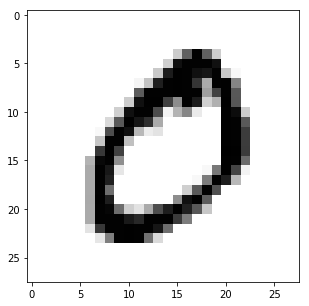

In [5]:
import matplotlib.pyplot as plt

train_data0,train_label0=train_dataset[1][0],train_dataset[1][1]
train_data0=train_data0.reshape([28,28])
plt.figure(figsize=(5,5))
plt.imshow(train_data0,cmap=plt.cm.binary)

In [12]:
linear=paddle.nn.Sequential(
        paddle.nn.Flatten(),#将[1,28,28]形状的图片数据改变形状为[1,784]
        paddle.nn.Linear(784,10)
        )
#利用paddlepaddle2的高阶功能，可以大幅减少训练和测试的代码量
model=paddle.Model(linear)
model.prepare(paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters()),
              paddle.nn.CrossEntropyLoss(), #交叉熵损失函数。线性模型+该损失函数，即softmax分类器。
              paddle.metric.Accuracy(topk=(1,2)))
model.fit(train_dataset, epochs=2, batch_size=64, verbose=1)

model.evaluate(test_dataset,batch_size=64,verbose=1)

Epoch 1/2
step 938/938 [==============================] - loss: 5.0028 - acc_top1: 0.8295 - acc_top2: 0.9217 - 6ms/step        
Epoch 2/2
step 938/938 [==============================] - loss: 3.4917 - acc_top1: 0.8808 - acc_top2: 0.9559 - 4ms/step         
Eval begin...
step 157/157 [==============================] - loss: 0.9658 - acc_top1: 0.8664 - acc_top2: 0.9472 - 4ms/step        
Eval samples: 10000


{'loss': [0.96577924], 'acc_top1': 0.8664, 'acc_top2': 0.9472}

经过2个epoch训练，top1分类准确率达到0.8808，top2分类准确率达到0.9559。测试集上的top1准确率达到0.8664，top2准确率达到0.9472.